In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
data=pd.read_csv("Salary_Data.csv")
data.tail()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


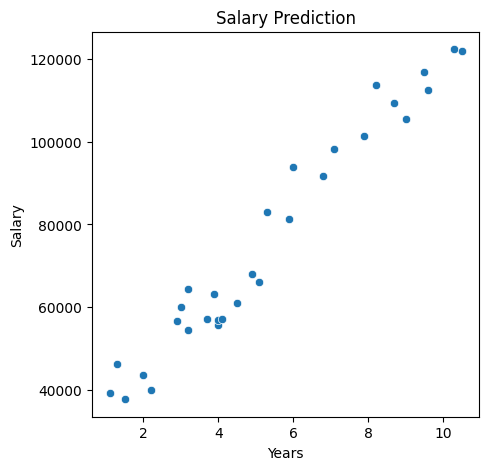

In [6]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x="YearsExperience", y="Salary", data=data)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)


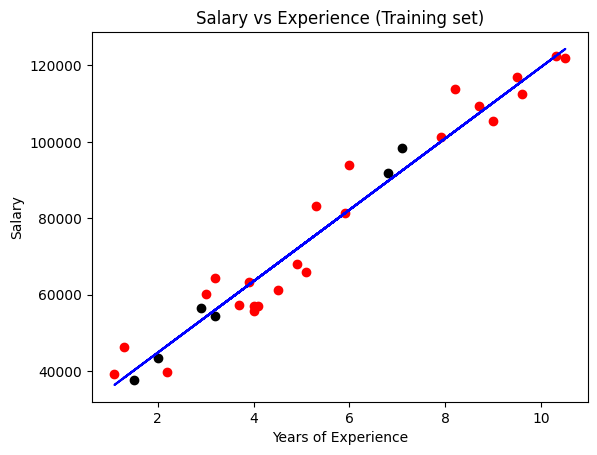

In [26]:
my_model=LinearRegression()
my_model.fit(x_train,y_train)
plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color='black', label='Test data')
plt.plot(x_train, my_model.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

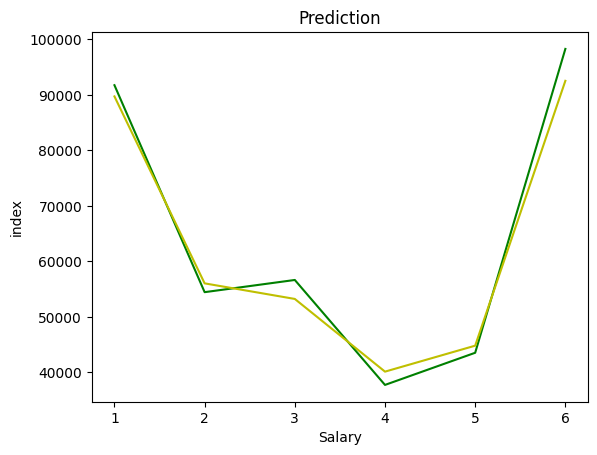

In [9]:
y_pred = my_model.predict(x_test)
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='g',linestyle='-')
plt.plot(c,y_pred,color='y',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [10]:
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]


In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)  
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)

X_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)

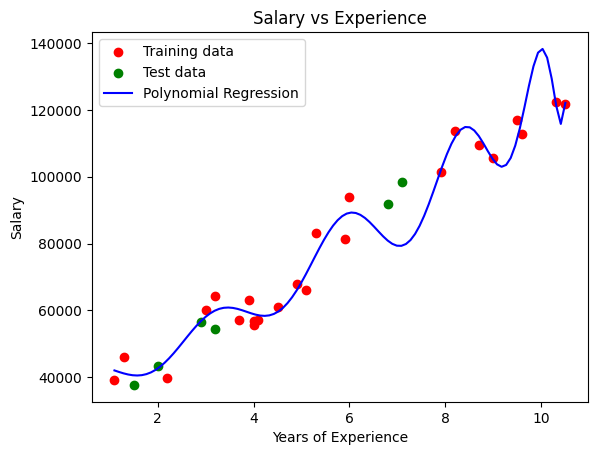

In [25]:
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(X_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Optimized parameters: theta_0 = 0.600000000000003, theta_1 = 0.8000000000000003


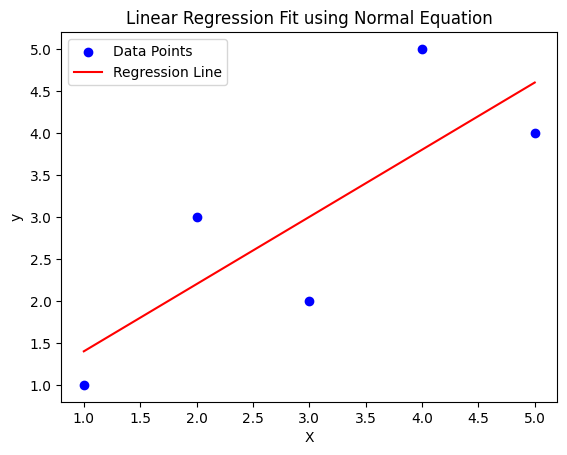

In [27]:
import numpy as np

# Sample data (replace with your actual data)
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 4])

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X

# Compute the parameters using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the parameters
theta_0, theta_1 = theta_best
print(f"Optimized parameters: theta_0 = {theta_0}, theta_1 = {theta_1}")

# Make predictions using the optimized parameters
y_pred = X_b.dot(theta_best)

# Plotting the data points and the regression line
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.show()